Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as any collaborators you worked with:

In [1]:
COLLABORATORS = ""

---

In [3]:
from __future__ import print_function
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt
import time

# HW 7:  Intro to Linear Algebra



# Linear Algebra: Part 1

## Question 1: Matrix Norms and Condition Numbers

Consider the Matrices

$$
    A = \begin{bmatrix} 1 & 1 \\
                        1 & a \\
         \end{bmatrix} \quad\quad
     A^{-1} = \frac{1}{a-1}\begin{bmatrix} a & -1 \\
                        -1 & 1 \\
         \end{bmatrix} 
$$
where $a\in\mathbb{R}$

**(a)** [6] Analytically calculate, as a function of $a$

* the induced $p$-norm $||A||_p$ 
* the $p$ condition number $\kappa_p(A) =||A||_p||A^{-1}||_p$ 

consider  $p=1,2,\infty$

(hint: for a symmetric matrix, the singular values are equal to the absolute value of the eigenvalues of $A$ (sorted from largest to smallest))

$||A||_p$  \
$\quad$Induced 1-norm is the max of the 1-norm of columns of A \
$\quad$p=1 \
$\quad$For -1 $\leqq$ a $\leqq$ 1: \
$\qquad$$||A||_1$ = 2 $\qquad$ $K_1$(A)= $||A||_1 ||A^{-1}||_{P1}$ = 2$\cdot \frac{2}{a-1}$ = $\frac{4}{a-1}$ \
$\quad$For a $\leqq$ -1 or a $\geq$ 1: \  
$\qquad$$||A||_1$ = 1 | $||a|| \qquad K_1$(A)=(1+$|a|$)$\cdot \frac{1+|a|}{a-1}$=$\frac{(1+|a|)^2}{a-1}$ \
$\quad$p=2 \
$\quad$Induced 2-norm is the max sigular value \
$\qquad$ A = $U\Sigma V^T$ \
$\qquad$$||A||_2$ = $\frac{1}{2}(a+1\pm\sqrt{a^2-2a+5}$) \
$\quad$p=$\infty$ \
$\quad$Induced $\infty$-norm is the 1-norm of rows of A. \
$\quad$For -1 $\leqq$ a $\leqq$ 1: \
$\qquad$$||A||_{\infty}$=2 $\qquad$ $K_{\infty}$(A)=$\frac{4}{a-1}$ \
$\quad$For a $<$ -1 or a $>$ 1: $\qquad$ $K_{\infty}$(A)=$\frac{(1+|a|)^2}{a-1}$ \
$\quad$p=2 $\quad K_{2}(A) = \frac{1}{2}(a+1\pm\sqrt{a^2-2a+5})\cdot\frac{1}{2(a-1)}(a+1\pm\sqrt{a^2-2a+5})$ 

**(b)** [6] write two short python routine that returns $||A||_p$, and $\kappa_p(A)$ for the matrices in part (a). Again, just consider $p=1,2,\infty$) and raise a ValueError if $p$ is any other value.

In [4]:
def mypnorm(a, p ):
    """
    return ||A||_p for A = [[ 1, 1],
                            [ 1, a]]
                            
    for p=1, 2, or numpy.infty
    
    parameters:
    -----------
    
    a: scalar 
        value of a
    p: scalar
        1, 2 or np.infty
    returns:
    --------
    pnorm(a)
    
    raises:
    --------
    ValueError:  if p is not in [ 1, 2, numpy.infty]
    """
    A = numpy.array([ [ 1, 1], [1, a]])
    
    if p == numpy.inf:
        norm = numpy.max(numpy.sum(numpy.abs(A), axis=1))
        #norm = numpy.max(numpy.abs(a))
    elif p == 1:
        norm = numpy.max(numpy.sum(numpy.abs(A), axis=0))
        #norm = 1+numpy.sum(numpy.abs(a)**p)**(1./p)
    elif p == 2:
        norm = numpy.max(numpy.linalg.svd(A, compute_uv=False))
        #norm = 1+numpy.sum(numpy.abs(a)**p)**(1./p)
    else:
        raise ValueError 
    
    #return numpy.linalg.norm(A(a), ord=p)
    return norm
    
def mycond(a, p):
    """
    write your own docstring to return the condition number
    """
    if p in [1, 2, numpy.infty]:
        if p == 1 or p == numpy.infty :
            return (1/abs(a-1)) * max(2, 1 + abs(a))**2
        else:
            z = numpy.sqrt(a**2 - 2*a +5)
            return(1/4/abs(a-1)) * max(abs(a+1+z), abs(a+1-z))**2
    else:
        raise ValueError
          

In [5]:
A = lambda a: numpy.array([ [ 1, 1], [1, a]])
aa = numpy.array([ -2, 0, 1.0001, 2])


for p in [ 1, 2, numpy.infty]:
    normp = [ mypnorm(a, p) for a in aa]
    test = [ numpy.linalg.norm(A(a), ord=p) for a in aa]    
    print('||A||_{} = {}'.format(p, normp))
    numpy.testing.assert_allclose(normp,test)
print('Successful Norm test')

for p in [ 1, 2, numpy.infty]:
    condp = [ mycond(a, p) for a in aa]
    test = [ numpy.linalg.cond(A(a), p) for a in aa]    
    print('k(A)_{} = {}'.format(p, condp))
    numpy.testing.assert_allclose(condp,test)
print('Successful condition number test')

# test the exception
try:
    mypnorm(0.,4)
except ValueError as err:
    print('Success: you caught the ValueError')
else:
    assert False, 'whoops, missed the exception'


||A||_1 = [3.0, 2.0, 2.0000999999999998, 3.0]
||A||_2 = [2.302775637731995, 1.618033988749895, 2.0000500012499995, 2.618033988749895]
||A||_inf = [3.0, 2.0, 2.0000999999999998, 3.0]
Successful Norm test
k(A)_1 = [3.0, 4.0, 40004.00010000439, 9.0]
k(A)_2 = [1.7675918792439984, 2.618033988749895, 40002.00007500566, 6.854101966249685]
k(A)_inf = [3.0, 4.0, 40004.00010000439, 9.0]
Successful condition number test
Success: you caught the ValueError


 **(c)** [4] Make a plot comparing $\log(\kappa(A))$ vs $a$ for the different matrix norms over the range $a\in[-15,15]$. (you can check it by plotting `numpy.linalg.cond(A, ord)` as well. As always, make it pretty.

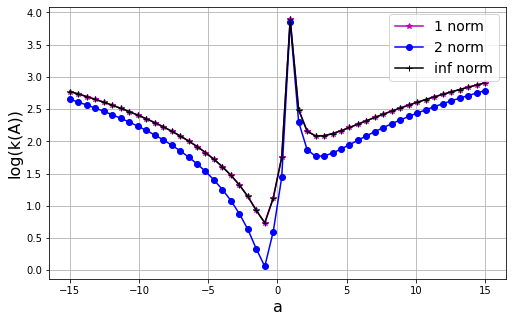

In [18]:
A = lambda a: numpy.array([[ 1, 1], [1, a]])
a_range = numpy.linspace(-15, 15)

cond_1 = [mycond(a, 1) for a in a_range]
cond_2 = [mycond(a, 2) for a in a_range]
cond_inf = [mycond(a, numpy.infty) for a in a_range]

fig = plt.figure(figsize=(18, 5))
axes = fig.add_subplot(1, 2, 1)
axes.plot(a_range, numpy.log(cond_1), 'm*-', label = '1 norm')
axes.plot(a_range, numpy.log(cond_2), 'bo-', label = '2 norm')
axes.plot(a_range, numpy.log(cond_inf), 'k+-', label = 'inf norm')
axes.set_xlabel('a', fontsize=16)
axes.set_ylabel('log(k(A))', fontsize=16)
axes.legend(loc='best',fontsize=14)
axes.grid()

**(d)** [8] Given your plot comment on the following:
* What value of $a$ gives the best conditioned matrix.  Why?
* What value of $a$ gives the least well-condition matrix.  Why?
* Does it matter which norm we measure the condition number in?
* What value of $a$ gives the best conditioned matrix for $a>1$
 

a) The values close to -1 appear to give the best conditioned matrix  \
b) When is close to 1 or at large positive and negative values we get the least well conditioned matrix.\
c) Yes as the scale on the y axis can differ even if the general shape and trend seems to be the same\
d) When a is close to 3 or equals 3

## Question 2: Conditioning and LU factorization

Consider the two identical linear problems $A\mathbf{x}=\bf{b}$

$$
    \begin{bmatrix} \epsilon & 1 \\ 1 & 1 \\ \end{bmatrix}\mathbf{x}=\begin{bmatrix} 1\\ 2\end{bmatrix} \quad\quad
     \begin{bmatrix} 1 & 1 \\\epsilon & 1 \\ \end{bmatrix}\mathbf{x}=\begin{bmatrix} 2\\ 1\end{bmatrix} 
$$
where $\epsilon \ll \epsilon_{mach}$

**(a)**  [6 pts] Find the 1 condition number of both matrices. Are they the same?  Are these matrices well conditioned? Check your answer using numpy with $\epsilon = 0.1\epsilon_{mach}$

Both matrices are well conditioned

In [23]:
eps = 0.1*numpy.finfo(float).eps

A = numpy.array([[eps,1],[1,1]])
B = numpy.array([[1,1],[eps,1]])

condA = numpy.linalg.cond(A,1)
condB = numpy.linalg.cond(B,1)

print("1-conditioned number 1 is {}, 1-conditioned number 2 is {}".format(condA, condB))

1-conditioned number 1 is 4.0, 1-conditioned number 2 is 4.0


**(b)**  [4 pts] Find the analytic solution to both problems in infinite precision.  Are they the same?

From previous analysis on question 2a we could use:\
$$
\mathbf{x_1} = \mathbf{A_1^{-1}b_1} \\
\mathbf{x_1} = \begin{bmatrix} x_1\\x_2\\\end{bmatrix} = \frac{1}{\epsilon -1}\begin{bmatrix} 1 & -1 \\ -1 & \epsilon \end{bmatrix} \\
\mathbf{x_1} = \frac{1}{\epsilon -1}\begin{bmatrix} -1 \\ -1 + 2 \epsilon \end{bmatrix} \\
$$
now we solve for $\mathbf{x_2}$
$$
\mathbf{x_2} = \mathbf{A_2^{-1}b_2} \\
\mathbf{x_2} = \begin{bmatrix} x_1\\x_2\\\end{bmatrix} = \frac{1}{1-\epsilon}\begin{bmatrix} 1 & -1 \\ -\epsilon & 1 \end{bmatrix} \begin{bmatrix} 2 \\ 1 \end{bmatrix} \\
\mathbf{x_1} = \frac{1}{1-\epsilon}\begin{bmatrix} 1 \\ 1 - 2 \epsilon \end{bmatrix} = \frac{1}{\epsilon-1}\begin{bmatrix} -1 \\ -1 + 2 \epsilon \end{bmatrix}\\
$$
From these results we can see that $x_1$ and $x_2$ are the same 

**(c)**  [4 pts] Now solve both problems analytically using the $LU$ decomposition *without pivoting* but applying the rules of floating point math.  Do you get the same answer?  

the $LU$ decomposition of  
$$ A_1 =  \begin{bmatrix} \epsilon & 1 \\ 1 & 1 \\ \end{bmatrix}$$
is

$$ A_1 =  \begin{bmatrix} 1 & 0 \\ \frac{1}{\epsilon} & 1 \\ \end{bmatrix}
          \begin{bmatrix} \epsilon & 1 \\ 0  & 1 - \frac{1}{\epsilon} \\ \end{bmatrix}
$$

and for 
$$ A_2 =  \begin{bmatrix}  1 & 1 \\ \epsilon & 1 \\ \end{bmatrix}$$
with $LU$ factorization

$$ A_2 =  \begin{bmatrix} 1 & 0 \\ \epsilon & 1 \\ \end{bmatrix}
          \begin{bmatrix} 1 & 1 \\ 0  & 1 - \epsilon \\ \end{bmatrix}
$$

Solving $L\mathbf{c} = \mathbf{b}$ then $U\mathbf{x}=\mathbf{c}$ 

for the first problem:

$$
    L_1\mathbf{c_1} = \begin{bmatrix} 1\\2\\\end{bmatrix}
$$

or 
$$
\mathbf{c_1} = \begin{bmatrix} 1. \\ 2 - 1./\epsilon \\ \end{bmatrix} \approx \begin{bmatrix} 1. \\  -1./\epsilon \\ \end{bmatrix}
$$
in finite precision...Likewise $U_1$ in finite precisions solve
$$
    \begin{bmatrix} \epsilon & 1 \\ 0  & - \frac{1}{\epsilon} \\ \end{bmatrix}\mathbf{x_1} = \begin{bmatrix} 1. \\  -\frac{1}{\epsilon} \\ \end{bmatrix}
$$ 
gives
$$
    \mathbf{x_1} = \begin{bmatrix} 0.\\ 1 \\ \end{bmatrix} 
$$

The other problem gives 

$$\mathbf{c_2} = \begin{bmatrix} 2 \\ 1 -2\epsilon \\ \end{bmatrix}\approx\begin{bmatrix} 2 \\ 1 \\ \end{bmatrix}
$$

and

$$\mathbf{x_2} = \begin{bmatrix} 1 \\ 1\\ \end{bmatrix}
$$
which is different

**(d)**  [6 pts] Check your solutions using numpy.  

For each problem 
* Calculate the solution using $L\mathbf{c}=\mathbf{b}$, $U\mathbf{x}=\mathbf{c}$ for each pair of $L,U$ derived above (you can use numpy here with $\epsilon=0.1\epsilon_{mach}$)
* Calculate the 1-condition number for each $L$ and $U$ 

Briefly explain these results


In [21]:
# YOUR CODE HERE

L = numpy.array([[1, 0],[1/eps,1]])
U = numpy.array([[eps, 1],[0, 1-1/eps]])
b = numpy.array([1,2])
c = numpy.linalg.solve(L, b)
x = numpy.linalg.solve(U, c)
Ucond = numpy.linalg.cond(U, 1)
Lcond = numpy.linalg.cond(L, 1)

print('Solutions for A_1:')
print(f'\tc_1 ={c}')
print(f'\tx_1 ={x}')
print('\ncondition number for L and U for A_1:')
print(f'\tk (L1) = {Lcond}')
print(f'\tk (U1) = {Ucond}')

L2 = numpy.array([[1, 0],[eps,1]])
U2 = numpy.array([[1, 1],[0, 1-eps]])
b2 = numpy.array([2,1])
c2 = numpy.linalg.solve(L2, b2)
x2 = numpy.linalg.solve(U2, c2)
U2cond = numpy.linalg.cond(U2, 1)
L2cond = numpy.linalg.cond(L2, 1)

print('Solutions for A_2:')
print(f'\tc_2 ={c2}')
print(f'\tx_2 ={x2}')
print('\ncondition number for L and U for A_2:')
print(f'\tk (L2) = {L2cond}')
print(f'\tk (U2) = {U2cond}')


Solutions for A_1:
	c_1 =[ 1.000000000000000e+00 -4.503599627370496e+16]
	x_1 =[0. 1.]

condition number for L and U for A_1:
	k (L1) = 2.028240960365167e+33
	k (U1) = 2.028240960365167e+33
Solutions for A_2:
	c_2 =[2. 1.]
	x_2 =[1. 1.]

condition number for L and U for A_2:
	k (L2) = 1.0
	k (U2) = 4.0
